In [1]:
import pandas as pd
import os
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_theme(style="darkgrid")
path = os.path.dirname(__name__)
lux_temp_csv = os.path.join(path, "lux_temp.csv")
lux_cost_csv = os.path.join(path, "lux_energy.csv")

In [2]:
temp_df = pd.read_csv(lux_temp_csv)
cost_df = pd.read_csv(lux_cost_csv)
temp_df["Date"] = temp_df["Date"].astype("datetime64[s]")
cost_df["Date"] = cost_df["Date"].astype("datetime64[s]")
cost_df = cost_df[cost_df["Date"] <= "2024-12-26"]

In [3]:
temp_df

,Date,Temp
0,2015-01-01,-1.6
1,2015-01-02,0.4
2,2015-01-03,1.9
3,2015-01-04,1.9
4,2015-01-05,-2.1
...,...,...
3643,2024-12-22,3.6
3644,2024-12-23,2.4
3645,2024-12-24,1.9
3646,2024-12-25,3.9


In [4]:
df = temp_df.merge(cost_df, "left", "Date")

In [5]:
df

,Date,Temp,Cost
0,2015-01-01,-1.6,22.34
1,2015-01-02,0.4,22.34
2,2015-01-03,1.9,22.34
3,2015-01-04,1.9,22.34
4,2015-01-05,-2.1,36.18
...,...,...,...
3643,2024-12-22,3.6,21.42
3644,2024-12-23,2.4,60.81
3645,2024-12-24,1.9,100.91
3646,2024-12-25,3.9,93.38


In [6]:
df["Perc_Temp"] = 0
df["Perc_Cost"] = 0

In [ ]:
for idx, row in df.iterrows():
    if idx == 0:
        df["Perc_Cost"][idx] = 0
        df["Perc_Temp"][idx] = 0
    else:
        df["Perc_Cost"][idx] = (df["Cost"][idx] - df["Cost"][idx-1])
        df["Perc_Temp"][idx] = (df["Temp"][idx] - df["Temp"][idx-1])

/tmp/ipykernel_48362/2626570312.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Perc_Cost"][idx] = 0
/tmp/ipykernel_48362/2626570312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [8]:
df = df[(df["Date"] >= "2024-01-01") & (df["Date"] <= "2024-12-01")]

In [9]:
df = df[abs(df["Perc_Cost"]) <= 1.5 ]
df = df[abs(df["Perc_Temp"]) <= 1.5 ]

<Axes: xlabel='Date', ylabel='Perc_Temp'>

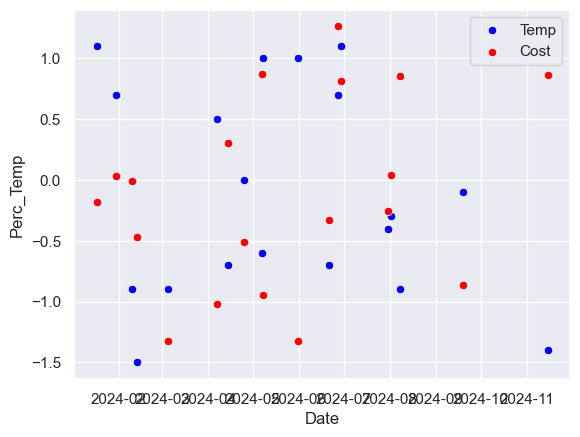

In [12]:
sns.scatterplot(x='Date', y='Perc_Temp', data=df, label='Temp', color='blue')
sns.scatterplot(x='Date', y='Perc_Cost', data=df, label='Cost', color='red')

<Axes: xlabel='Temp', ylabel='Cost'>

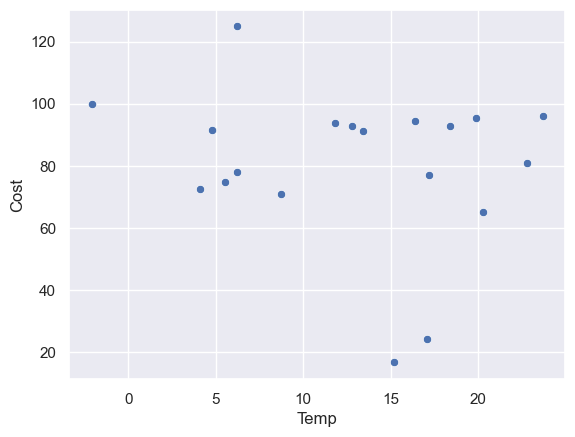

In [11]:
sns.scatterplot(df, x="Temp", y="Cost")